In [5]:
# This is some code if you are running on collab
#!git clone https://github.com/jagar2/Mat_497_Fall_2019_dev.git

Cloning into 'Mat_497_Fall_2019_dev'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 9), reused 45 (delta 6), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [6]:
# This is some code if you are running on collab
#cd Mat_497_Fall_2019_dev/

/content/Mat_497_Fall_2019_dev


# Introductory Notes

* Much of the content presented here was adapted from `fast.ai` if you have questions or would like more details I would recommend viewing their website
* `fast.ai` has built a package that serves as a wrapper for `pytorch` with a lot of utility functions.
    * This is a good starting place but as you progress you will likely want to shift to more flexible packages for deep learning

# Deep learning packages

1. TensorFlow - This is based out of google
    * Flexible architecture
    * Written in Python

2. Torch is a scientific computing framework that offers wide support for machine learning algorithms. 
    * It is a Lua-based deep learning framework and is used widely amongst industry giants such as Facebook, Twitter, and Google. 
    * Very flexible for complex DNNs
    * Displacing use of Tensorflow

3. Keras - a lightweight and simple implementation of Tensorflow
    * A simple version of TensorFlow which is easier to use. 
    * It has a nice simple interface
    * Keras was purchased by Google and is now part of the core API for TensorFlow

3. Caffe - Deep learning framework that is supported with interfaces like C, C++, Python, and MATLAB as well as the command line interface
    * Good because it can be used in a lot of languages
    * Very fast
    * limited implementation of complex neural networks

4. DeepLearning4J - A Java based deep learning platform
    * Can use Hadoop and spark. Can run servers on web interfaces

# What people say about deep learning which are either pointless or untrue
![](https://github.com/jagar2/Mat_497_Fall_2019_dev/blob/master/images/1_5.png?raw=1)

# Rather than just talking about theory for awhile lets do something!

# What's your pet

* we will build our first image classifier from scratch, and see if we can achieve world-class results. 

This is some useful code. It makes sure that that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [ ]:
# You will need to run this if fastai is not installed
# !pip install -U fastai --user

    100% |████████████████████████████████| 604kB 2.2MB/s eta 0:00:01
    100% |████████████████████████████████| 1.5MB 1.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ab/05/27e1466475e816d3001efb6e0a85a819be17411420494a1e602c36f8299d/bleach-3.1.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 163kB 4.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8f/b7/f329cfdc75f3d28d12c65980e4469e2fa373f1953f5df6e370e84ea2e875/decorator-4.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 5.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/59/9e/e16335ee2d645ee48f082e4207d4fad9bdce09cc1537e76320c341d8d75c/ipykernel-4.10.1-py2-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b0/88/d996ab8be22cea1eaa18baee3678a

    100% |████████████████████████████████| 204kB 4.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1b/9e/1a170feaa54f22aeb5a5d16c9015e82234275a3c8ab630b552493f9cb8a9/testpath-0.4.4-py2.py3-none-any.whl
    100% |████████████████████████████████| 496.9MB 3.8kB/s eta 0:00:011��█████████████▌         | 349.4MB 40.9MB/s eta 0:00:04 70% |██████████████████████▋         | 351.9MB 60.0MB/s eta 0:00:03K    72% |███████████████████████         | 358.4MB 131.8MB/s eta 0:00:02█████████████████████▏      | 391.0MB 128.0MB/s eta 0:00:01��████████████████████    | 434.0MB 39.1MB/s eta 0:00:02   88% |████████████████████████████▌   | 441.8MB 76.0MB/s eta 0:00:01█████████████████████████▋   | 444.0MB 67.6MB/s eta 0:00:01█████████████████████████   | 448.9MB 73.2MB/s eta 0:00:01.0MB 79.1MB/s eta 0:00:01.4MB 78.1MB/s eta 0:00:01.9MB 63.2MB/s eta 0:00:01474.7MB 97.6MB/s eta 0:00:01MB/s eta 0:00:01�█████████████████▋| 490.3MB 74.0MB/s eta 0:00:01�█████████████████▊| 493.1MB 95.4M

    100% |████████████████████████████████| 102kB 6.0MB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 921kB 1.9MB/s eta 0:00:01�█                | 460kB 59.5MB/s eta 0:00:01
    100% |████████████████████████████████| 8.2MB 235kB/s  eta 0:00:01|█▏                              | 286kB 38.4MB/s eta 0:00:01    45% |██████████████▋                 | 3.7MB 122.1MB/s eta 0:00:01/s eta 0:00:01
    100% |████████████████████████████████| 71kB 6.1MB/s eta 0:00:01
    100% |████████████████████████████████| 5.5MB 331kB/s eta 0:00:011
    100% |████████████████████████████████| 61kB 5.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d8/a6/f46ae3f1da0cd4361c344888f59ec2f5785e69c872e175a748ef6071cdb5/futures-3.3.0-py2-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/10/369f50bcd4621b263927b0a1519987a04383d4a98fb10438042ad410cf88/singledispatch-3.4.0.3-py2.py3-none-any.whl
 

    100% |████████████████████████████████| 81kB 7.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for fastai ... done
  Stored in directory: /home/trondheim/.cache/pip/wheels/6a/76/e1/d5ecd7e00c93fcd1524baa3db4e8011cb19f216ad4cad8ec81
  Running setup.py bdist_wheel for bcolz ... done
  Stored in directory: /home/trondheim/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... done
  Stored in directory: /home/trondheim/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/trondheim/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
  Running setup.py bdist_wheel for torchtext ... done
  Stored in directory: /home/trondheim/.cache/pip/wheels/7f/0b/a7/53f554f01d205ac7039ef96028eb886f52e235cdfae5ecf7ef
  Running setup.py bdist_wheel for subprocess32 ... \

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [2]:
bs = 64 # sets the batch size
#bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. 
* According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. 
* Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. 
* We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. 
* Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. 
* We will need to extract them to be able to classify the images into the correct categories. 
* Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images/leonberger_18.jpg'),
 PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_192.jpg'),
 PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images/Siamese_126.jpg'),
 PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_11.jpg'),
 PosixPath('/home/trondheim/.fastai/data/oxford-iiit-pet/images/great_pyrenees_23.jpg')]

In [8]:
#np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

With this factory method, we can basically say:

- path_img: a path containing images
- fnames: a list of file names
- pat: a regular expression (i.e. pattern) to be used to extract the label from the file name
- ds_tfm: we'll talk about transforms later
- size: what size images do you want to work with.

This might seem weird because images have size. This is a shortcoming of current deep learning technology which is that a GPU has to apply the exact same instruction to a whole bunch of things at the same time in order to be fast. If the images are different shapes and sizes, you can't do that.

In fastai, everything you model with is going to be a DataBunch object. 
DataBunch object contains 2 or 3 datasets:
* Training data, 
* Validation data 
* Test data. 

For each of those, it contains your images and your labels, your texts and your labels, or your tabular data and your labels, or so forth. And that all sits there in this one place(i.e. `data`). 


Something we will learn more about in a little bit is normalization. But generally in nearly all machine learning tasks, you have to make all of your data about the same "size" - they are specifically about the same mean and standard deviation.  So there is a normalize function that we can use to normalize our data bunch in that way.

It means that the pixel values start out from 0 to 255. 
* some channels might tend to be really bright, some might tend to be really not bright at all, some might vary a lot, and some might not very much at all. 
**It really helps train a deep learning model if each one of those red green and blue channels has a mean of zero and a standard deviation of one.** 

If your data is not normalized, it can be quite difficult for your model to train well. So if you have trouble training a model, one thing to check is that you've normalized it.

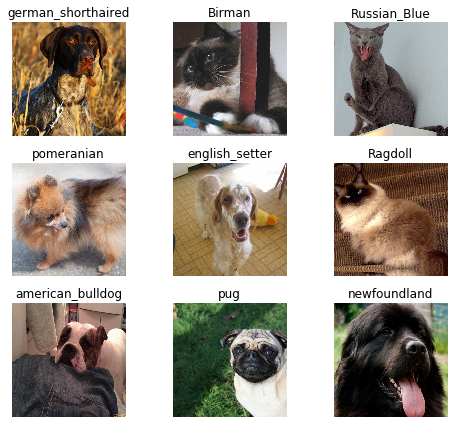

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

It is important to know that `data.c` is a really important piece of information that is something like, or at least for classification problems it is, the number of classes. 

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. 

We will train for 4 epochs (4 cycles through all our data).

 - **DataBunch**: A general fastai concept for your data, and from there, there are subclasses for particular applications like ImageDataBunch
 - **Learner**: A general concept for things that can learn to fit a model. From that, there are various subclasses to make things easier in particular, there is a convnet learner  (something that will create a convolutional neural network for you).

In [12]:
# downloads and instanciates the model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/trondheim/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 32.2MB/s]


* `data`: What's your data. Not surprisingly, it takes a data bunch.
* `arch`: What's your architecture. There are lots of different ways of constructing a convolutional neural network.

In [13]:
# This shows the model
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

So now we have a ConvLearner, we can fit it. You can just use a method called `fit` but in practice, you should nearly always use a method called `fit_one_cycle`. 

In short, one cycle learning is [a paper](https://arxiv.org/pdf/1803.09820.pdf) that was released in April and turned out to be dramatically better both more accurate and faster than any previous approach. Again, I don't want to teach you how to do 2017 deep learning. In 2018/19, the best way to fit models is to use something called one cycle. 

In [14]:
# Trains the model for 4 epochs
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.376839,0.332995,0.103518,00:12
1,0.607025,0.297215,0.093369,00:11
2,0.391407,0.254336,0.087280,00:11
3,0.287288,0.223984,0.075101,00:11


We just trained a model. We don't know exactly what that involved or how it happened but we do know that with 3 or 4 lines of code, we've built something which smashed the accuracy of the state-of-the-art of 2012. 6% error certainly sounds like pretty impressive for something that can recognize different dog breeds and cat breeds, but we don't really know why it work, but we will. That's okay.

In [15]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. 
* We will try to see if what the model predicted was reasonable or not. 
    * In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Plot the confusion matrix, we can see that the distribution is heavily skewed: 
* the model makes the same mistakes over and over again but it rarely confuses other categories. 
* This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

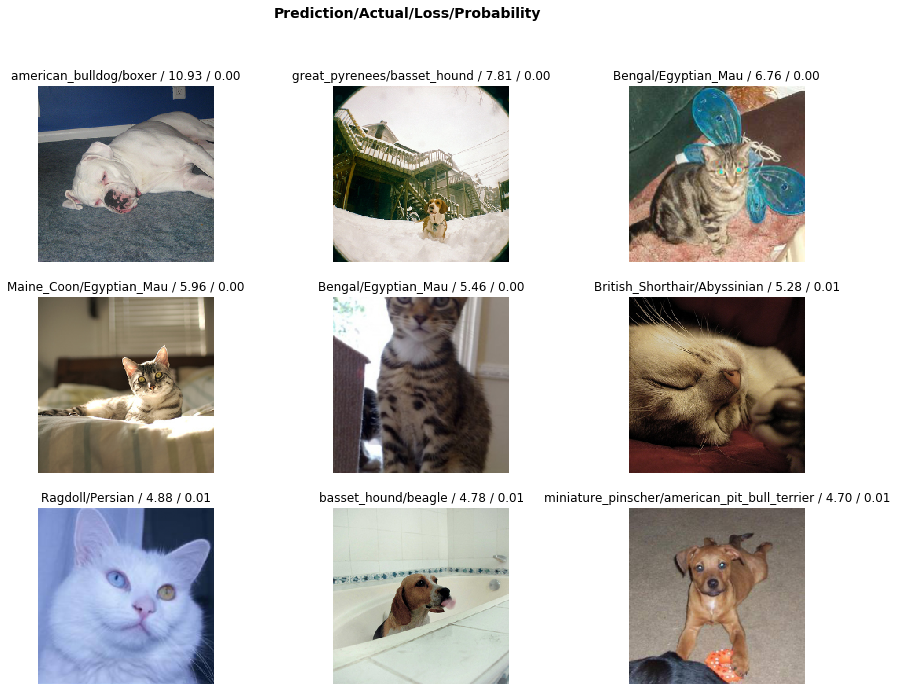

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
doc(interp.plot_top_losses)

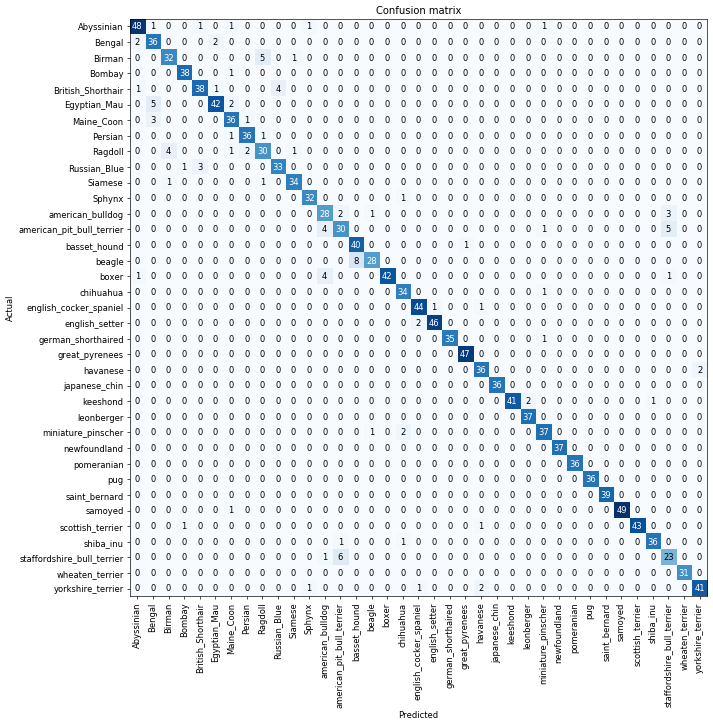

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('beagle', 'basset_hound', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('boxer', 'american_bulldog', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('keeshond', 'leonberger', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

What we really want to do is to go back and train the whole model. This is why we pretty much always use this two stage process. 
* By default, when we call `fit` or `fit_one_cycle` on a ConvLearner, it'll just fine-tune these few extra layers added to the end and it will run very fast. 
* It will basically never overfit but to really get it good, you have to call `unfreeze`. `unfreeze` is the thing that says please train the whole model. Then I can call fit_one_cycle again.

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.686711,0.401868,0.121786,00:15


## This got much worse, why? 

* We tried to update the whole model with the same big learning rate. 

There is a [a fantastic paper](https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf) by Matt Zeiler. 
* They wrote a paper showing how you can visualize the layers of a convolutional neural network. A convolutional neural network, which we will learn mathematically about what the layers 
* ResNet34 has 34 layers, and ResNet50 has 50 layers, but let's look at layer one. There's this very simple computation which is a convolution if you know what they are. 
* What comes out of this first layer? Well, we can actually visualize these specific coefficients, the specific parameters by drawing them as a picture. 

![](images/1_124.png)

![](images/1_125.png)

![](images/1_126.png)

![](images/1_127.png)

In [23]:
learn.load('stage-1');

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


This will plot the result of our LR finder and what this basically shows you is this key parameter called a learning rate. 
* The learning rate basically says how quickly am I updating the parameters in my model. 
* The x-axis one here shows me what happens as I increase the learning rate. The y axis show what the loss is. 

* So you can see, once the learning rate gets passed 10^-4, my loss gets worse. It actually so happens, in fact I can check this if I press <kbd>shift</kbd>+<kbd>tab</kbd> here, my learning defaults to 0.003.
* So you can see why our loss got worse. Because we are trying to fine-tune things now, we can't use such a high learning rate. 
* So based on the learning rate finder, I tried to pick something well before it started getting worse. So I decided to pick `1e-6`. 
    * But there's no point training all the layers at that rate, because we know that the later layers worked just fine before when we were training much more quickly. 
    * So what we can actually do is we can pass a range of learning rates to `learn.fit_one_cycle`. And we do it like this:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


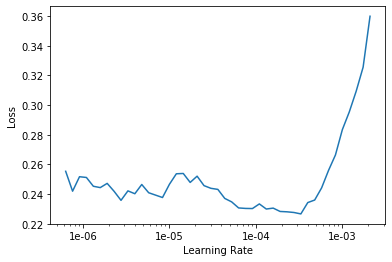

In [26]:
learn.lr_find()
learn.recorder.plot()

You use this keyword in Python called `slice` and that can take a start value and a stop value and basically what this says is train the very first layers at a learning rate of 1e-6, and the very last layers at a rate of 1e-4, and distribute all the other layers across that (i.e. between those two values equally). 

A good rule of thumb is after you unfreeze (i.e. train the whole thing), pass a max learning rate parameter, pass it a slice, make the second part of that slice about 10 times smaller than your first stage. 
* Our first stage defaulted to about 1e-3 so it's about 1e-4. 
* The first part of the slice should be a value from your learning rate finder which is well before things started getting worse. So you can see things are starting to get worse

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.240347,0.211378,0.070365,00:15
1,0.220178,0.206225,0.064953,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.185083,0.198758,0.060893,00:15
1,0.191508,0.192704,0.062246,00:15


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. You can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [28]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [29]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/trondheim/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.8MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


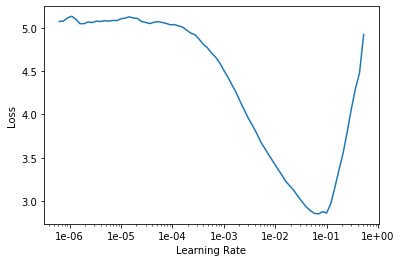

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.738544,0.322343,0.101489,00:36
1,0.462248,0.334995,0.100135,00:36
2,0.424794,0.286808,0.086604,00:36
3,0.322250,0.281755,0.088633,00:36
4,0.261198,0.244787,0.066982,00:36
5,0.209512,0.200244,0.066982,00:36
6,0.119770,0.196553,0.063599,00:36
7,0.101267,0.193963,0.064953,00:36


In [32]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [33]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112634,0.188768,0.060893,00:49
1,0.100493,0.195551,0.058187,00:48
2,0.096929,0.188885,0.058863,00:48


If it doesn't, you can always go back to your previous model.

In [34]:
learn.load('stage-1-50');

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

In [36]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Abyssinian', 'Bengal', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'pug', 2),
 ('leonberger', 'keeshond', 2),
 ('miniature_pinscher', 'Sphynx', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

## Other data formats

In [37]:
path = untar_data(URLs.MNIST_SAMPLE, force_download=True); path

PosixPath('/home/trondheim/.fastai/data/mnist_sample')

# Scenario 1: Labels are folder names

In [38]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

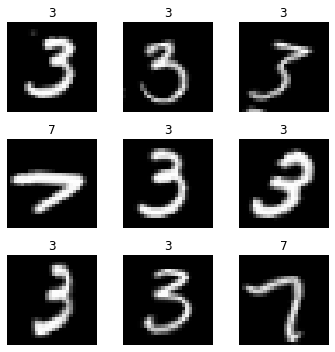

In [39]:
data.show_batch(rows=3, figsize=(5,5))

In [40]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/trondheim/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 84.8MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.199388,0.092116,0.968106,00:05
1,0.119945,0.052416,0.980864,00:04


In [41]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


# Scenario 2: CSV file

In [42]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

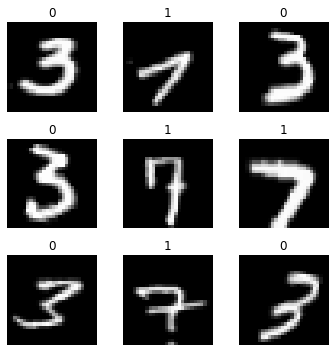

In [43]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [44]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

# Scenario 3: Using regular expression

In [45]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/trondheim/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/trondheim/.fastai/data/mnist_sample/train/3/21102.png')]

In [46]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

# Scenario 4: Something more complex

In [47]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

# Scenario 5: You need something even more flexible

In [48]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [49]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

# Creating your own dataset from Google Images

Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. 

**Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In this case we are going to make a teddy bear classifier

In [4]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Download images

In [5]:
folder = 'black'
file = 'black.csv'

path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(file, dest, max_pics=200, max_workers=0)

In [6]:
folder = 'teddys'
file = 'teddys.csv'

path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(file, dest, max_pics=200, max_workers=0)

In [7]:
folder = 'grizzly'
file = 'grizzly.csv'

path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(file, dest, max_pics=200, max_workers=0)

In [8]:
path = Path('data/bears')
path.ls()

[PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/black')]

In [9]:
classes = ['teddys','grizzly','black']

Then we can remove any images that can't be opened:
* It is a godo habit to verify that all your data is complete and good so things do not break
    * One bad piece of information can break your entire model.

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500, max_workers=0)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000020.png'>


## View data

* This will create an image bunch
* Will also normalize the data based on image net stats
* This will also make the test train split 

In [57]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=16).normalize(imagenet_stats)

**That was simple**

## Let's look at some examples

In [58]:
data.classes

['black', 'grizzly', 'teddys']

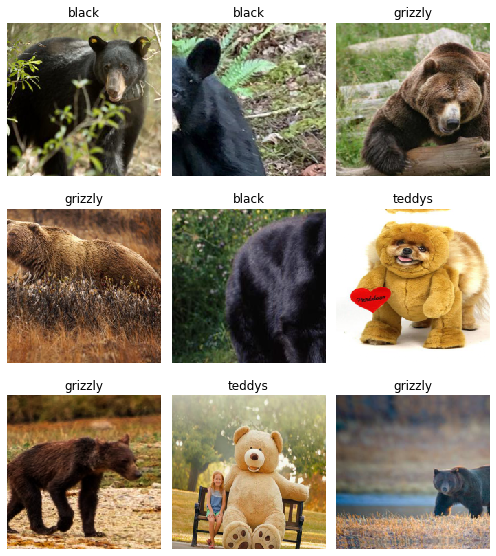

In [59]:
data.show_batch(rows=3, figsize=(7,8))

1. list the classes
2. The number of classes
3. The size of the training data
4. The size of the validation data set

In [60]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 220, 54)

## Train model

In [61]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [62]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.086105,0.018409,0.000000,00:01
1,0.615746,0.162226,0.092593,00:01
2,0.400095,0.043816,0.018519,00:01
3,0.355646,0.042577,0.018519,00:01


In [63]:
learn.save('stage-1')

In [64]:
learn.load('stage-1')
learn.unfreeze()

In [1]:
# If the plot is not showing try to give a start and end learning rate
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

NameError: name 'learn' is not defined

* You want to select the region with the smallest downward slope

In [67]:
learn.fit_one_cycle(2, max_lr=slice(1e-2,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,3.025418,2138340.750000,0.703704,00:01
1,2.164057,77.201164,0.814815,00:01


In [68]:
learn.save('stage-2')

## Interpretation

In [69]:
learn.load('stage-2');

In [70]:
interp = ClassificationInterpretation.from_learner(learn)

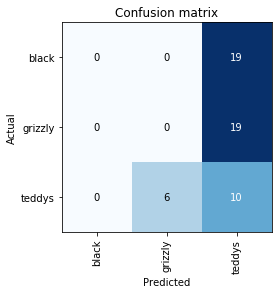

In [71]:
interp.plot_confusion_matrix()

# Let's take a second to pause here. 
* We took 300 examples and trained a classifier with a few minutes to predict the difference between black, grizzley, and teddys. 
* We just proved you don't need big data
* Remember, the test and training data is not well formed. In science our examples should be better. 

* To make this better you could find the examples (in the training dataset) that have the top losses
* This are likely bad training examples and can be manually removed. 
* There are applications for doing this but they will not run in collab.


## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [72]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [73]:
defaults.device = torch.device('cpu')

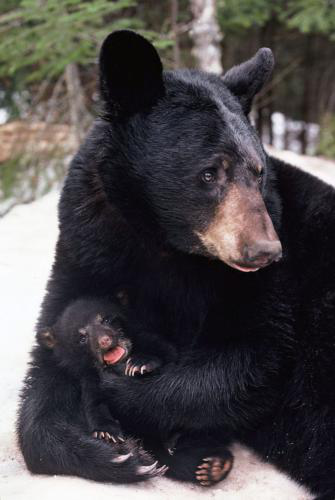

In [74]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [75]:
learn = load_learner(path)

In [76]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

* This allows you to deploy this in the cloud and build a web application toolkit
* This needs to be hosted

* [PythonAnywhere](https://www.pythonanywhere.com/)
* [Zeit Now](https://zeit.co/now)
  * It's something you can basically package it up as a docker thing and shoot it off and it'll serve it up for you. So it doesn't even need to cost you any money and all these classifiers that you're creating, you can turn them into web application.

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

* We can talk about these but I think it is better to experment with them first

In [77]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [78]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,29.487761,737471.875000,0.648148,00:01


* Your loss is supposed to be less than 1 (we normalized the data)
* Essentially, it is hopping in and out of minimum because the learning rate is so high

### Learning rate (LR) too low

In [79]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [80]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.824901,1.634760,0.740741,00:01
1,1.881583,1.481401,0.722222,00:01
2,1.786930,1.339759,0.703704,00:01
3,1.806981,1.305991,0.666667,00:01
4,1.706110,1.289886,0.648148,00:01


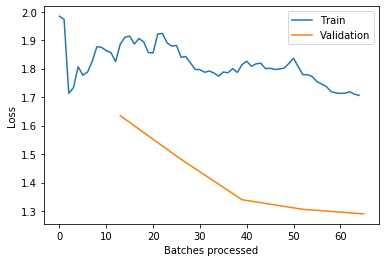

In [81]:
learn.recorder.plot_losses()

* `learn.recorder.plot_losses()` saves and plots losses during training
* You never want your training loss to be higher than your validation loss. This means you are not fitting
* You want to see the slope going down
* As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [82]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [83]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.428773,1.119970,0.500000,00:01


* This looks the same as too low of a learning rate.
* The model has not fitted.

### Too many epochs

In [84]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=16, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [85]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [86]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.175074,2.430360,0.634146,00:02
1,1.392168,2.141143,0.609756,00:01
2,1.333622,1.934794,0.601626,00:01
3,1.288270,1.748351,0.585366,00:01
4,1.254984,1.544462,0.540650,00:01
5,1.186731,1.307009,0.516260,00:01
6,1.099123,1.090919,0.447154,00:01
7,0.981843,0.887199,0.373984,00:01
8,0.886726,0.716493,0.313008,00:01
9,0.796764,0.591905,0.276423,00:01


* Overfitting
* If you train for too long as we're going to learn about it, it will learn to recognize your particular teddy bears but not teddy bears in general. 
* It is very hard to actually make a neural network overfit (you really have to try)
* Here I did what I could to make this network overfit and it did not really
* You want to look for the case where the training loss goes down and the validation loss goes up
* **You are not overfitting if the training loss is lower than the validation loss** This is always the case for a well trained model.


# Let's go back to basics and Understand what these things are
* Loss - a quantitative metric for the distance from the objective
* Epoch - One cycle through all of the data
* Learning rate - How responsive the update is to the gradient (you can think of this as what is gravity) 

![](images/2_18.png)
* numbers are just a matrix of pixel, if color it is a 3D tensor

![](images/2_19.png)

![](images/adam.gif)

* Neural networks give you a probability then you can use an argmax to determine the classes
`np.argmax` or `torch.argmax`

## Error rate can be looked at
* In this case it is just cross validation

In [87]:
error_rate??

## Accuracy

In [88]:
accuracy??

```python
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)
```
* The metric is what is going to be applied to the validation set to determine the error. 

* Rember to use the doc function. This will take you directly to the source code

In [89]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

# Digging into the math
Let's look and see how we create one of these functions, and let's start with the simplest functions I know:

$y=ax+b$

That's a line where

- a: gradient of the line
- b: the intercept of the line

It might help to rewrite this as: 
$y=a_1x+b_1$

$y=a_1x_1+a_2x_2$ where $x_2$ = 1

Since there are a lot of values: 
$y=a_1x_{i,1}+a_2x_{i,2}$

# And here comes the dreaded math

* This looks like we might end up doing loops 
* We could also remember that when you multiply things together and add them up is it called a *dot product*, and if you do this for lots of numbers it is called a *matrix product*

$\vec{y} = X\vec{a}$

![](images/matrix.gif)

* This is really all that is happening in deep learning platforms in an really efficient way.

# 2D Demonstration
* We did this early in the class but it is so important it is worth doing it again

In [90]:
%matplotlib inline
from fastai.basics import *

## Create some data

In [91]:
n=100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4928,  1.0000],
        [-0.5351,  1.0000],
        [ 0.3121,  1.0000],
        [ 0.6415,  1.0000],
        [ 0.1983,  1.0000]])

$a_1$ is 3, $a_2$ is 2

In [92]:
a = tensor(3.,2); a

tensor([3., 2.])

In [93]:
y = x@a + torch.rand(n)

`x@a` means the matrix product
*  It can be a vector vector product, a matrix vector product, a vector matrix product, or a matrix matrix product. 


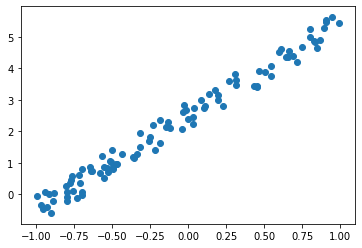

In [94]:
plt.scatter(x[:,0], y);

I know the word `tensor` still strikes fear into you. In deep learning it just means that it is a regularly sized matrix. 
- 4 by 3 matrix
- A vector of length 4
- A 3D array of length 3 by 4 by 6

A VGA picture could be 640 by 480 by 3 or actually we do things backwards so when people talk about images, they normally go width by height, but when we talk mathematically, we always go a number of rows by number of columns, so it would actually be 480 by 640 by 3

Dimensions are called `Rank`

## Syntax for PyTorch
* You can index just like numpy. `x[:,0]` means every single row of column 0. 
* When you have an underscore function e.g., `x[:,0].uniform_(-1,1)` that means don't return the value just replace it. 

* We are going to assume we do not know what the coefficents are and we will try and find them
* This method works equally well in 2 vs 50 million dimensions

# Loss Function
* We want to find the parameters, weights, or coefficents that minimize the error between the model and the points. 
* For a regression problem the most common loss function is the **mean squared error**

In [95]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

$\frac{\sum(\hat{y}-y)^2}{n}$

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [96]:
a = tensor(-1.,1)

* By including the -1. python knows these values are all floats

In [97]:
y_hat = x@a
mse(y_hat, y)

tensor(6.7201)

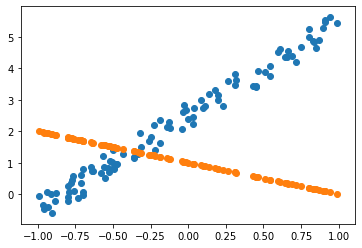

In [98]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

* Actual value commonly $y$ `y`
* Predicted value commonly $\hat{y}$ `y_hat`

# What is gradient descent:
* We are going to say what would happen if we changed these numbers a bit? 
  * What is we made the intercept a bit higher or lower
  * What is we made the gradient a little bit more positive or negative

  We are going to do this and see which makes the loss go down and that is what we are going to do

The good thing is we have calculus
* The gradient tells us how changing the values of a effects the MSE

In [99]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [100]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

## What is this doing? 
* calculate our prediction `y_hat`
* calculate the loss
* We will print it every 10th iteration
* Calculate the gradient
  * `.backwards()` - This is what computes the gradient
* Use the learning rate and the gradient and subtract them from the values


In [101]:
lr = 1e-1
for t in range(100): update()

tensor(6.7201, grad_fn=<MeanBackward0>)
tensor(1.5099, grad_fn=<MeanBackward0>)
tensor(0.4127, grad_fn=<MeanBackward0>)
tensor(0.1483, grad_fn=<MeanBackward0>)
tensor(0.0841, grad_fn=<MeanBackward0>)
tensor(0.0686, grad_fn=<MeanBackward0>)
tensor(0.0648, grad_fn=<MeanBackward0>)
tensor(0.0639, grad_fn=<MeanBackward0>)
tensor(0.0637, grad_fn=<MeanBackward0>)
tensor(0.0636, grad_fn=<MeanBackward0>)


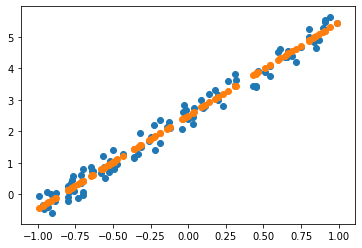

In [102]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [103]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [104]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

**That is about it for SGD**
The only difference is something called *mini-batches*
* We calculated the loss on the whole dataset every iteration. 
  * If your dataset is very large this is slow
* Instead we calculate the gradient on small batches (say 64) and update it each time.

# Vocabulary Reminder: 
- **Learning rate**: A thing we multiply our gradient by to decide how much to update the weights by.

- **Epoch**: One complete run through all of our data points (e.g. all of our images). So for non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if you've got a dataset with a thousand images and our mini-batch size is 100, then it would take you 10 iterations to see every image once. So that would be one epoch. Epochs are important because if you do lots of epochs, then you are looking at your images lots of times, so every time you see an image, there's a bigger chance of overfitting. So we generally don't want to do too many epochs.

- **Mini-batch**: A random bunch of points that you use to update your weights.

- **SGD**: Stochastic gradient descent using mini-batches.

- **Model / Architecture**: They kind of mean the same thing. In this case, our architecture is $\vec{y} = X\vec{a}$﹣ the architecture is the mathematical function that you're fitting the parameters to. And we're going to learn later today or next week what the mathematical function of things like ResNet34 actually is. But it's basically pretty much what you've just seen. It's a bunch of matrix products. 

- **Parameters / Coefficients / Weights**: Numbers that you are updating.

- **Loss function**: The thing that's telling you how far away or how close you are to the correct answer. For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

# Reminder on overfitting
# add overfitting image
* We don't want our equation to have too many parameters for the complexity of the curve

# Regularization and Validation Sets
* There are other ways to prevent and monitor overfitting
* Validation set tells you if your model is correct on never-before-seen examples.
* Regularization - any technique that makes learning harder so the model is more generalizable.